# Text Summary 

## 0. Task Definition: 
### Input:

1. Text: [substring1, substring2, substring3, ... substringN], defined as $S_o$
2. Tile: String

### Output: 

Subset of $S_o$: $ [substring_i, substring_j, .. substring_z] $, defined as $S_t$
   
    

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from summary.text_summary import *

In [31]:
file_path = 'experiment/analysis.txt'

In [32]:
title = '英国警方：希望恐怖威胁最高级别不会维持太久'

In [36]:
text_content = get_text_content(file_path, escape_english=False)

In [37]:
text_content

'【环球网报道 记者 朱佩】英国首相特蕾莎∙梅日前称，由于曼彻斯特恐袭案，该国恐怖威胁级别从“严重”提高至“危急”。这意味着可能派遣军队保障安全。据俄新社5月24日报道，伦敦警察厅反恐部门负责人马克•罗利表示，希望恐怖威胁级别不会太长时间维持在最高级别。\n罗利在回答恐怖威胁“危急”水平制度要维持多久的问题时说道：“我不想预测未来，但如果你看看我们的历史，这样一个威胁级别是非常不寻常和罕见的措施。它从未维持很久，我们也希望这样。但在这样一个高风险期我们将竭尽所能，军队将帮助我们。”\n当地时间5月22日晚，自杀式恐怖分子在曼彻斯特竞技场音乐厅内实施了爆炸。爆炸造成22人死亡，59人受伤。伤亡者中有许多儿童。至少有8人失踪。恐怖组织“伊斯兰国”声称对爆炸负责。\n'

### Get $ S_o $

In [57]:
sentences = get_text_sentence(file_path)

In [58]:
sentences[:10]

['环球网报道 记者 朱佩',
 '英国首相特蕾莎∙梅日前称',
 '由于曼彻斯特恐袭案',
 '该国恐怖威胁级别从“严重”提高至“危急”',
 '这意味着可能派遣军队保障安全',
 '据俄新社5月24日报道',
 '伦敦警察厅反恐部门负责人马克•罗利表示',
 '希望恐怖威胁级别不会太长时间维持在最高级别',
 '罗利在回答恐怖威胁“危急”水平制度要维持多久的问题时说道',
 '“我不想预测未来']

## 1. Get the sentence-text correlations.

### 1. 1 Sentence2Vec and Text2Vec

The weighted sum of Word Vectors. 

Reference: A SIMPLE BUT TOUGH-TO-BEAT BASELINE FOR SEN- TENCE EMBEDDINGS, * Sanjeev Arora, Yingyu Liang, Tengyu Ma *, Princeton University


###  1. 2 Correlations. 

#### 1.2.1 Distance: 

For each sentence in $ S_o $, we caculate the two distance: 1. d_t: the consine distance of sentence-title; 2. d_c: the consine distance of sentence-content. (Content is the vector of this text.)

#### 1.2.2 Correlation:

For each sentence in text. We define the correlation as: 

$$ C = p * \sigma(1 - d_t) + (1 - p) * \sigma(1 - d_c) , \sigma = softmax $$

In other words, the single correlation defined as $ 1 - d_i $

We could get the correlations of each sentences. 

In [54]:
from summary.nolinear_summary import get_one_file_complex_correlation

/Users/kouminquan/anaconda/envs/env-3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [45]:
%%time
correlations = get_one_file_complex_correlation(file_path, title=title)

CPU times: user 138 ms, sys: 4.84 ms, total: 143 ms
Wall time: 143 ms


In [41]:
correlations[:10]

[0.025368230050735983,
 0.0450608054312421,
 0.041277128688496693,
 0.037957553864266552,
 0.049095815444793883,
 0.028002114653755385,
 0.05584990867868056,
 0.060557024103807658,
 0.05746783362596726,
 0.042842974302011408]

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

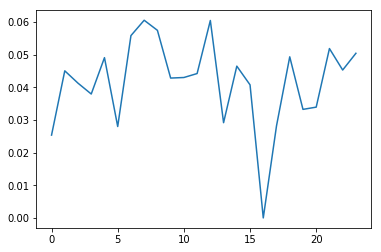

In [42]:
plt.plot(correlations)

In [14]:
from summary.utils import plot_corelation

In [26]:
from summary.utils import accumulate, is_outliner

In [27]:
from summary.utils import clean_outliner

In [47]:
correlations = clean_outliner(correlations)

/Users/kouminquan/AI-LAB/Chinese-New-Phrase-Detection/summary/utils.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  if (_1st_percentile / x) > threshold or (x / _3th_percentile) > threshold:


corelation length is: 23


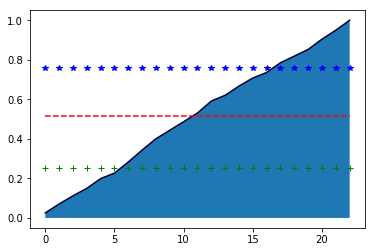

In [48]:
plot_corelation(accumulate(correlations))

## 2. Analysis if one text is fit for get summary. 

In [16]:
verbose = 'experiment/many_verbose.txt'

In [17]:
title = '处女座剧组人设崩塌？穿帮+广告毁了《欢乐颂2》'

In [18]:
%%time
verbose_correlations = get_one_file_complex_correlation(file_path, title=title)

CPU times: user 797 ms, sys: 23.9 ms, total: 821 ms
Wall time: 1.03 s


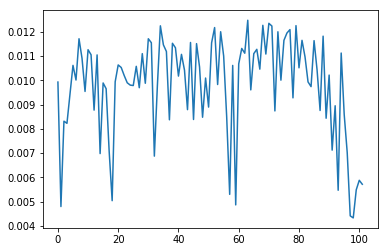

In [49]:
plt.plot(verbose_correlations)

corelation length is: 93


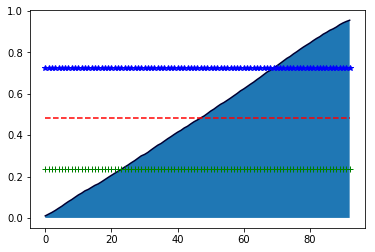

In [50]:
plot_corelation(accumulate(clean_outliner(verbose_correlations)))

We could see, the line is almost *straight*, which means has no main point.

In [51]:
from summary.suitful import have_main_point

correlation length is: 93


(False, 0.0002816149681461118)

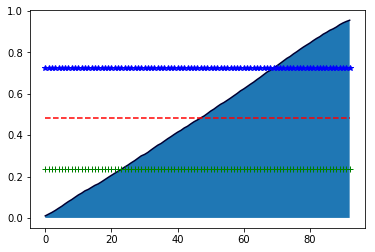

In [52]:
have_main_point(verbose_correlations)

correlation length is: 23


(True, 0.001758250979710917)

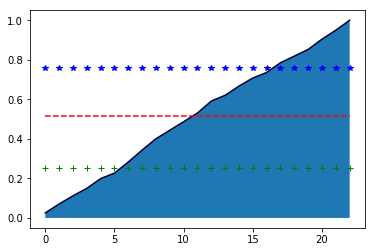

In [53]:
have_main_point(correlations)

Note: ** Coherence is beyond current consideration.**

## 3. Get the main sentences.

### 3.1 Put the sentences into right 'sentence bucket'

In [55]:
from summary.nolinear_summary import get_complete_sentences_with_correlations

In [64]:
correlations = get_one_file_complex_correlation(file_path, title=title)

In [69]:
complete_sentences = get_complete_sentences_with_correlations(sentences, correlations, text_content)

/Users/kouminquan/AI-LAB/Chinese-New-Phrase-Detection/summary/utils.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  else:


In [70]:
complete_sentenes = list(complete_sentences)

In [71]:
complete_sentenes[:5]

[(['环球网报道 记者 朱佩'], [0.025368230050735983]),
 (['英国首相特蕾莎∙梅日前称', '由于曼彻斯特恐袭案', '该国恐怖威胁级别从“严重”提高至“危急”'],
  [0.0450608054312421, 0.041277128688496693, 0.037957553864266552]),
 (['这意味着可能派遣军队保障安全'], [0.049095815444793883]),
 (['据俄新社5月24日报道', '伦敦警察厅反恐部门负责人马克•罗利表示', '希望恐怖威胁级别不会太长时间维持在最高级别'],
  [0.028002114653755385, 0.05584990867868056, 0.060557024103807658]),
 (['罗利在回答恐怖威胁“危急”水平制度要维持多久的问题时说道'], [0.05746783362596726])]

## Compound(Nolinear) correlations
If we analysis one sentence, which consist of several sub sentences, such as: ['英国首相特蕾莎∙梅日前称', '由于曼彻斯特恐袭案', '该国恐怖威胁级别从“严重”提高至“危急”'], with a correlations [0.0450608054312421, 0.041277128688496693, 0.037957553864266552], if some value is outlinear of the whole text subsentences, the value would be None.

We need get the compound correlation of this complete sentence.
We define the complex or nolinear correlation of a sentence as: 

Define: 

+ Correlation_nolinear to be  $ C_{nl}$
+ subsentences's correlations to be $ C_s $, e.g [0.0450608054312421, 0.041277128688496693, 0.037957553864266552, None]

Analysis: 

$$ C_{nl} \propto C_i \quad , (C_i \in C_s )$$
$$\therefore \quad C_{nl} = \sum{C_s}$$
However, there are some sentences have so many sub-sentences, and some sentences have *some * sub-sentences but with **high correlations.**. The result of this phenomenon is the sentences with so many short substences will have a very large compound correlaton. 

Considering the length of one sentence. 
$$ C_{nl} \propto length(sentence)$$
$$ \therefore \quad C_{nl} = mean(C_s) * length(sentence) $$

In order to decrease the influence of very long sentence, change the formula above to: 

$$ C_{nl} = mean(C_s) * \log(len(sentence))$$

But, there are so many sentences consist *verbose* or not important sub-senteces, therefore, 

$$ C_{nl} \propto Ratio_{importants}$$

therefore, we could calculate the *important content ratio * of one sentence by the ratio of its outlinears.

$$ content_ratio = \frac{num(substrings_{important})} {num{(substrings)}}$$

$$ \therefore \quad mean(C_s) * \log(len(sentence * content_{ratio} + 1))$$

In [78]:
from summary.nolinear_summary import get_merged_correlation, f

In [80]:
get_merged_correlation(complete_sentenes[0][1], complete_sentenes[0][0], f)

0.063037683546425624

In [86]:
for s, c in complete_sentenes:
    compound_correlations = get_merged_correlation(c, s, f)
    print("{}: {}: {}".format(s, c, compound_correlations))

['环球网报道 记者 朱佩']: [0.025368230050735983]: 0.06303768354642562
['英国首相特蕾莎∙梅日前称', '由于曼彻斯特恐袭案', '该国恐怖威胁级别从“严重”提高至“危急”']: [0.0450608054312421, 0.041277128688496693, 0.037957553864266552]: 0.1548584897091741
['这意味着可能派遣军队保障安全']: [0.049095815444793883]: 0.13295393288855106
['据俄新社5月24日报道', '伦敦警察厅反恐部门负责人马克•罗利表示', '希望恐怖威胁级别不会太长时间维持在最高级别']: [0.028002114653755385, 0.05584990867868056, 0.060557024103807658]: 0.19019844719626167
['罗利在回答恐怖威胁“危急”水平制度要维持多久的问题时说道']: [0.05746783362596726]: 0.19351119652707605
['“我不想预测未来', '但如果你看看我们的历史', '这样一个威胁级别是非常不寻常和罕见的措施']: [0.042842974302011408, 0.043014432672896244, 0.044227022903208443]: 0.15995526022583584
['它从未维持很久', '我们也希望这样']: [0.060480219714353009, 0.029175791375924753]: 0.12139648943152434
['但在这样一个高风险期我们将竭尽所能', '军队将帮助我们']: [0.046493834965511821, 0.040764946368631129]: 0.14043759087196667
['”']: [None]: -1
['当地时间5月22日晚', '自杀式恐怖分子在曼彻斯特竞技场音乐厅内实施了爆炸']: [0.02819821415569982, 0.049350460598615836]: 0.13785626522941458
['爆炸造成22人死亡', '59人受伤']: [0.033250690411189512, 0

/Users/kouminquan/anaconda/envs/env-3/lib/python3.4/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kouminquan/anaconda/envs/env-3/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### At Last: Choose the fitful top-n based on those compund correlations.